## Exploring dataset
This notebook is intended for exploring the dataset (images and metadata).

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
import sys
sys.path.append("../")

## Generate image statistics

1. Read the images from the folder
2. Store the results in a CSV file
3. Read images statistics from the generated CSV file
4. Get dataset statistics
5. Plot histogram for the data in dataset
6. Check the unique sources from metadata file


In [2]:
from src.preprocessing.image_preprocessor import get_images_statistics,plot_images_statistics,get_edges_images_statistics,get_masked_images_statistics
import pandas as pd

# Available categories in the dataset
dataset = ['COVID','NORMAL','Viral Pneumonia','Lung_Opacity']

# Path to the raw data and preprocessed data
raw_data_dir = '../data/raw/COVID-19_Radiography_Dataset/'
preprocessed_data_dir = '../data/preprocessed/'

In [3]:
for i in dataset:
    metadata_df = pd.read_csv(raw_data_dir+i+'.metadata.csv')
    print(f"Found {len(metadata_df)} entries for {i}.")

Found 3616 entries for COVID.
Found 10192 entries for NORMAL.
Found 1345 entries for Viral Pneumonia.
Found 6012 entries for Lung_Opacity.


## Find dataset sources

For understanding the quality of the dataset, it is important to check the source of the dataset by checking the URLs in metadata files.

In [4]:
for i in dataset:
    stats = pd.read_csv(raw_data_dir+i.lower()+'.metadata.csv', index_col=0)
    display(i, 'Number of sources '+str(len( stats.URL.unique())),  stats.URL.unique())

'COVID'

'Number of sources 6'

array(['https://sirm.org/category/senza-categoria/covid-19/',
       'https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png',
       'https://eurorad.org', 'https://github.com/armiro/COVID-CXNet',
       'https://github.com/ieee8023/covid-chestxray-dataset',
       'https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711'],
      dtype=object)

'NORMAL'

'Number of sources 2'

array(['https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data',
       'https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'],
      dtype=object)

'Viral Pneumonia'

'Number of sources 1'

array(['https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'],
      dtype=object)

'Lung_Opacity'

'Number of sources 1'

array(['https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data'],
      dtype=object)

### Finding duplicates in Dataset

In [5]:
for i in dataset:
    image_stats = get_images_statistics(raw_data_dir+i+'/images')
    duplicate = image_stats[image_stats.duplicated(subset=['min','max','mean','median','std'], keep=False)]
    print(f"Found {len(duplicate)} duplicate images in {i} dataset.")
    display(duplicate.head(len(duplicate)))
    del image_stats

Found 87 duplicate images in COVID dataset.


,image,min,max,mean,median,std
32,COVID-3574,0,248,150.407143,168.0,58.946602
36,COVID-3212,0,237,135.069373,147.0,58.367951
39,COVID-3548,0,238,147.537421,164.0,59.759305
70,COVID-3428,0,252,140.276742,162.0,80.698313
164,COVID-3429,0,252,140.276742,162.0,80.698313
...,...,...,...,...,...,...
3488,COVID-3140,0,244,142.263409,153.0,53.101601
3517,COVID-3141,0,244,142.263409,153.0,53.101601
3582,COVID-3223,0,240,130.953490,138.0,58.211268
3586,COVID-2667,0,252,103.815539,113.0,73.843631


Found 2 duplicate images in NORMAL dataset.


,image,min,max,mean,median,std
258,Normal-818,0,255,163.996074,185.0,66.857433
9145,Normal-817,0,255,163.996074,185.0,66.857433


Found 14 duplicate images in Viral Pneumonia dataset.


,image,min,max,mean,median,std
87,Viral Pneumonia-954,3,221,140.497679,159.0,56.171286
298,Viral Pneumonia-953,3,221,140.497679,159.0,56.171286
345,Viral Pneumonia-1052,0,251,131.362502,141.0,44.319861
356,Viral Pneumonia-1053,0,251,131.362502,141.0,44.319861
418,Viral Pneumonia-75,0,203,122.852630,136.0,51.037572
450,Viral Pneumonia-117,0,212,131.937585,153.0,60.209828
457,Viral Pneumonia-74,0,203,122.852630,136.0,51.037572
468,Viral Pneumonia-249,0,209,123.288050,152.0,69.406542
669,Viral Pneumonia-295,0,223,95.982125,97.0,52.348950
732,Viral Pneumonia-294,0,223,95.982125,97.0,52.348950


Found 0 duplicate images in Lung_Opacity dataset.


,image,min,max,mean,median,std


### Getting statistics for full images

Processing images for: COVID


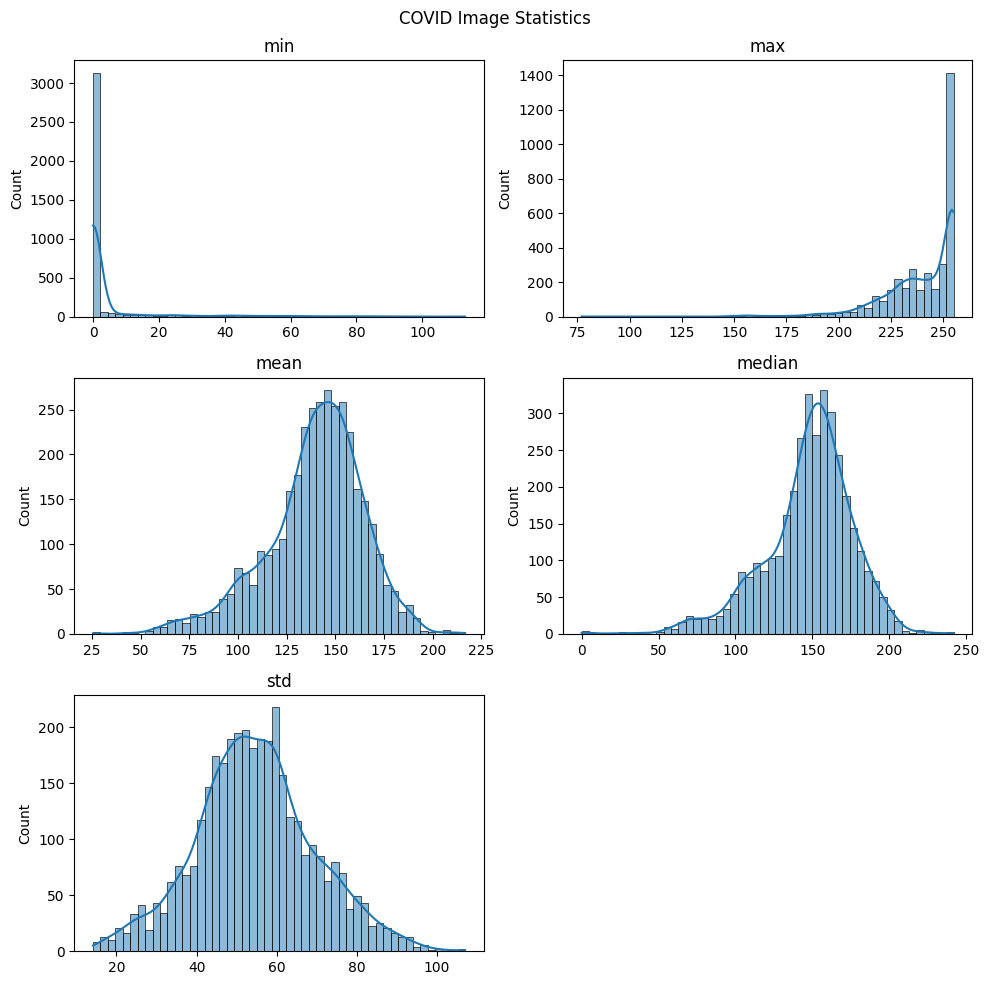

Processing images for: NORMAL


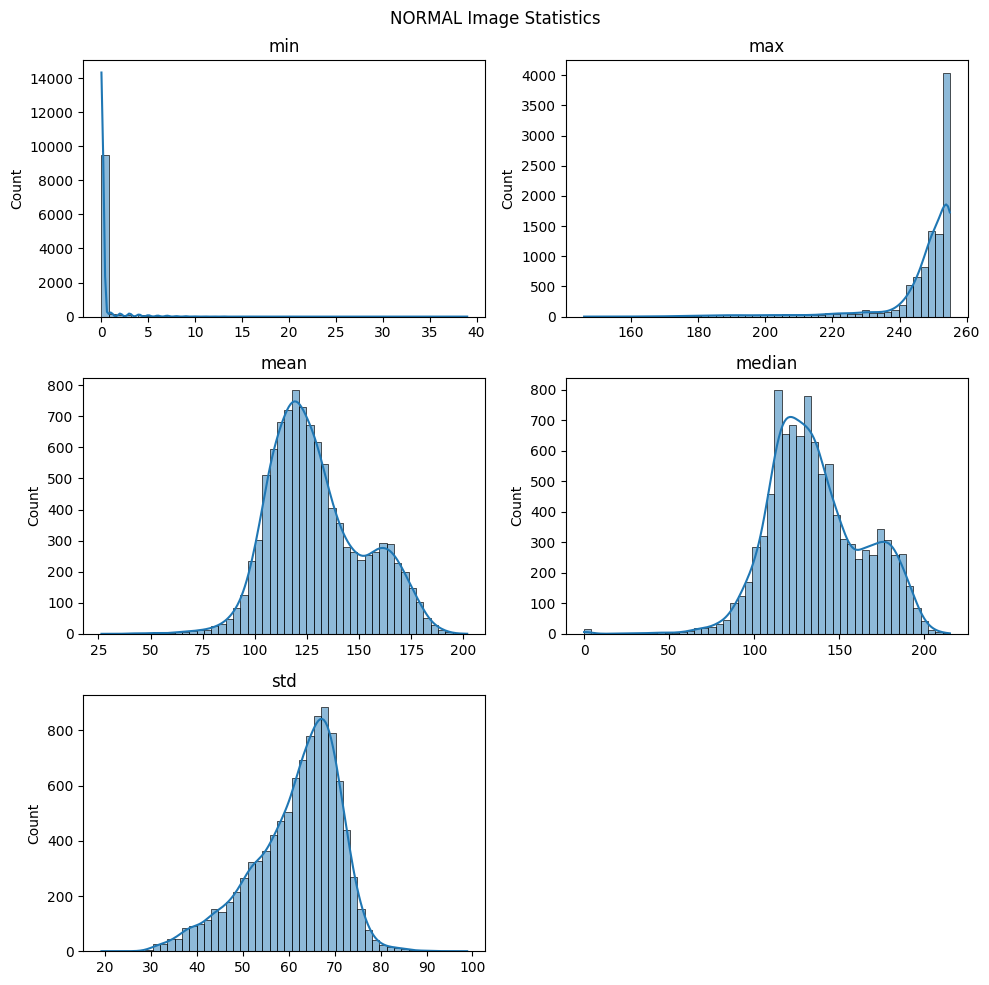

Processing images for: Viral Pneumonia


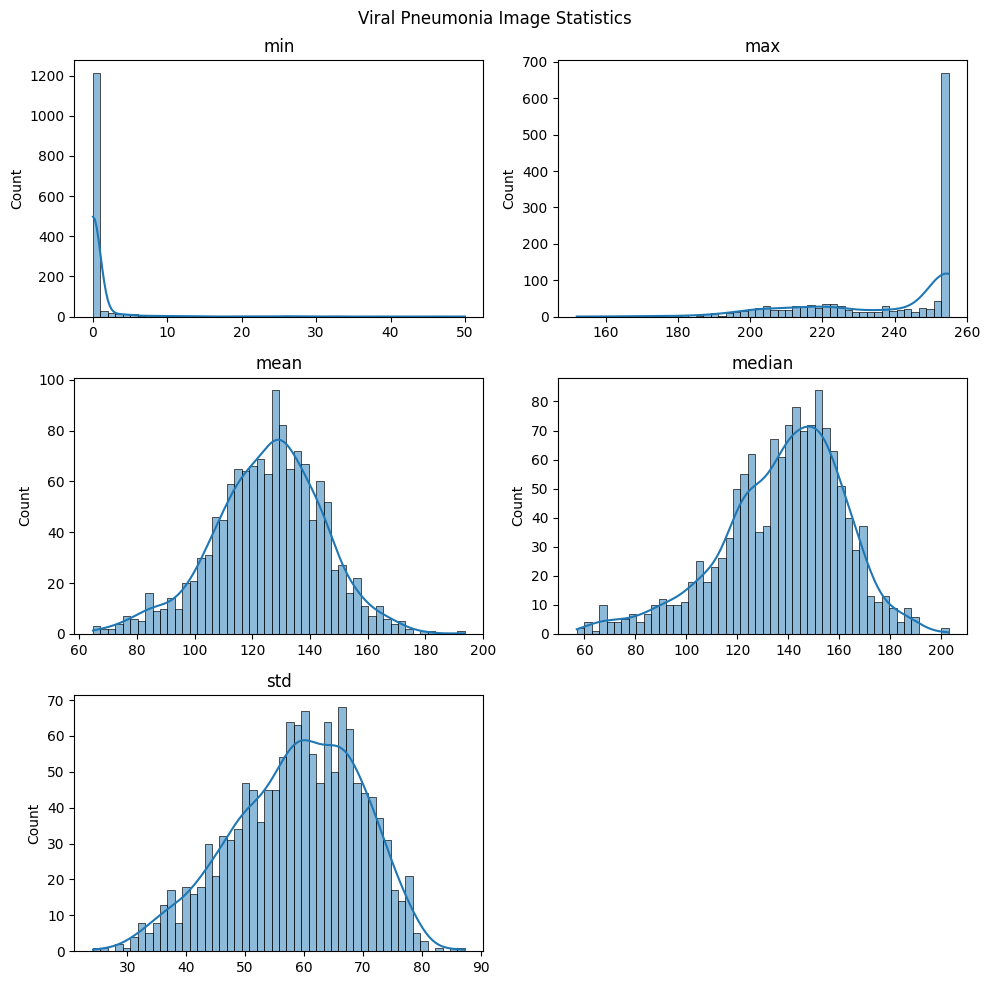

Processing images for: Lung_Opacity


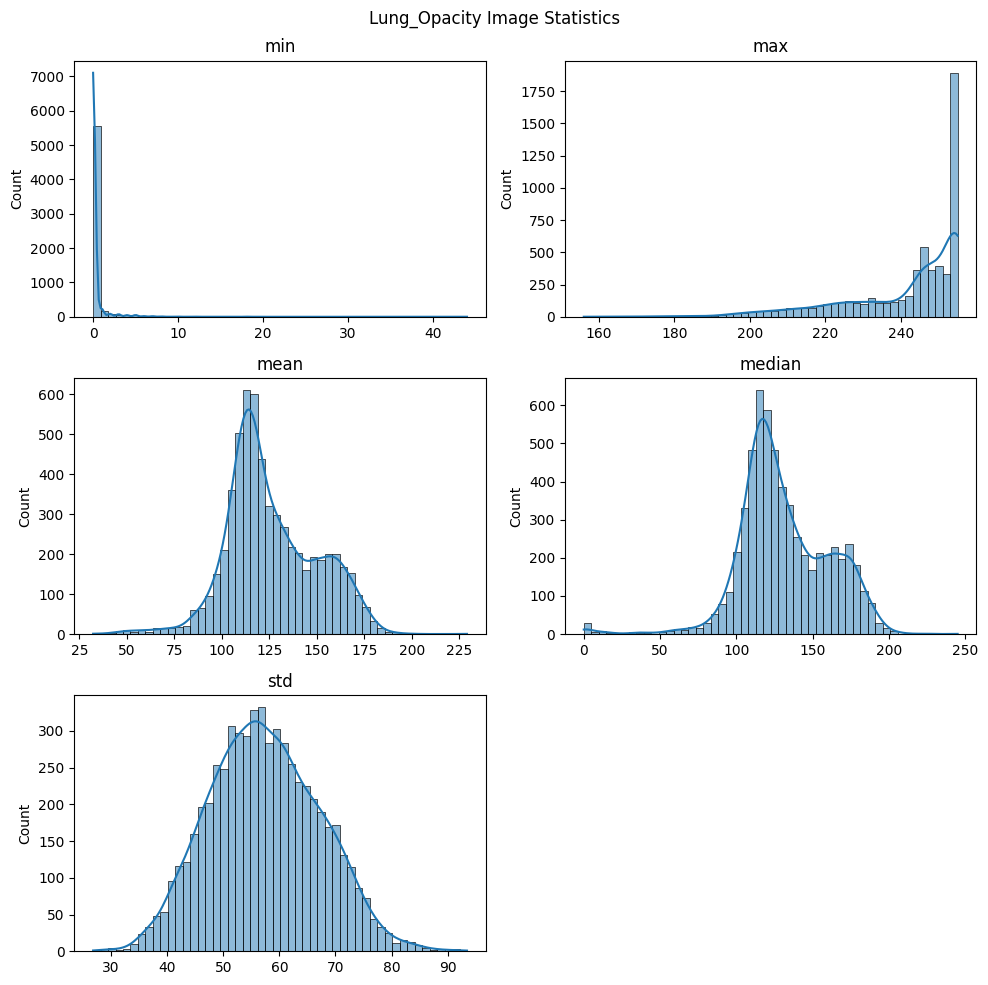

In [6]:
for i in dataset:
    print('Processing images for:',i)
    image_stats = get_images_statistics(raw_data_dir+i+'/images')
    plot_images_statistics(i,image_stats)
    del image_stats


### Getting statistics for cropped images

The below statistics are for images cropped by `10%` as an attempt to remove the unwanted text in the images.

Processing images for: COVID


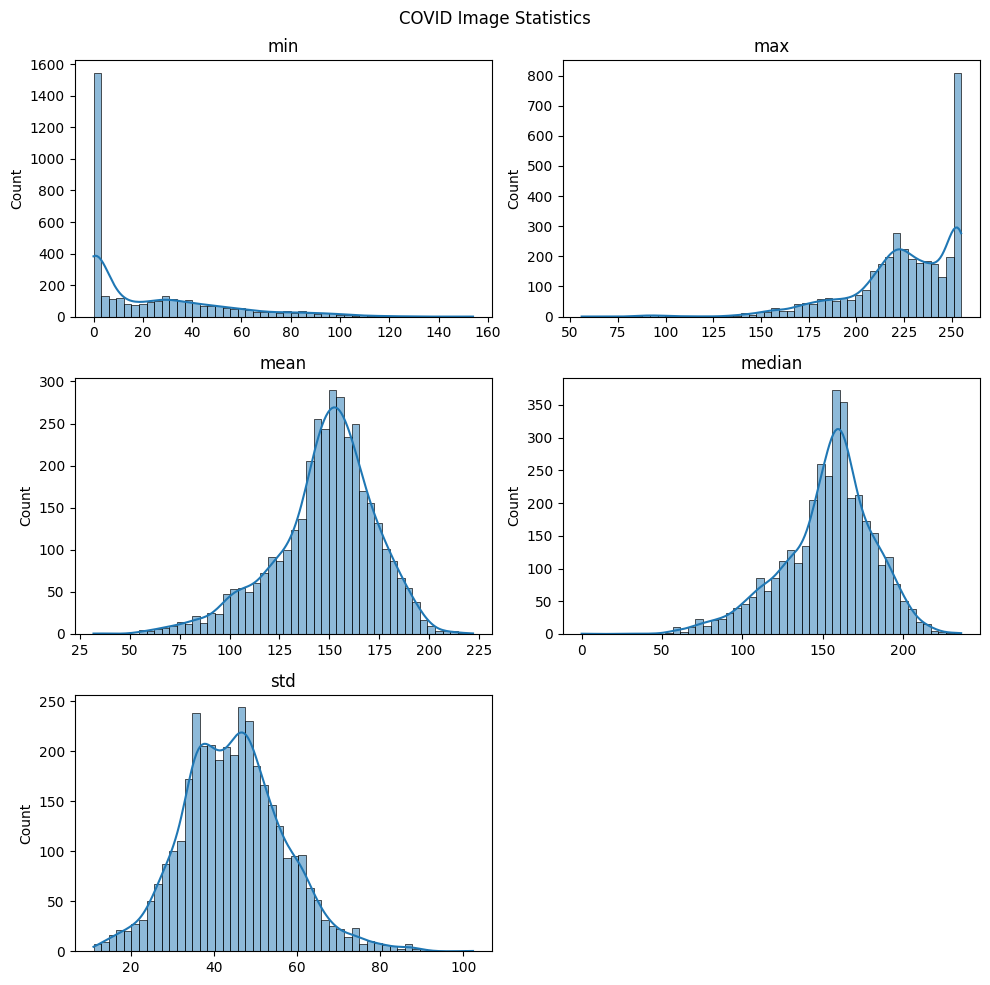

Processing images for: NORMAL


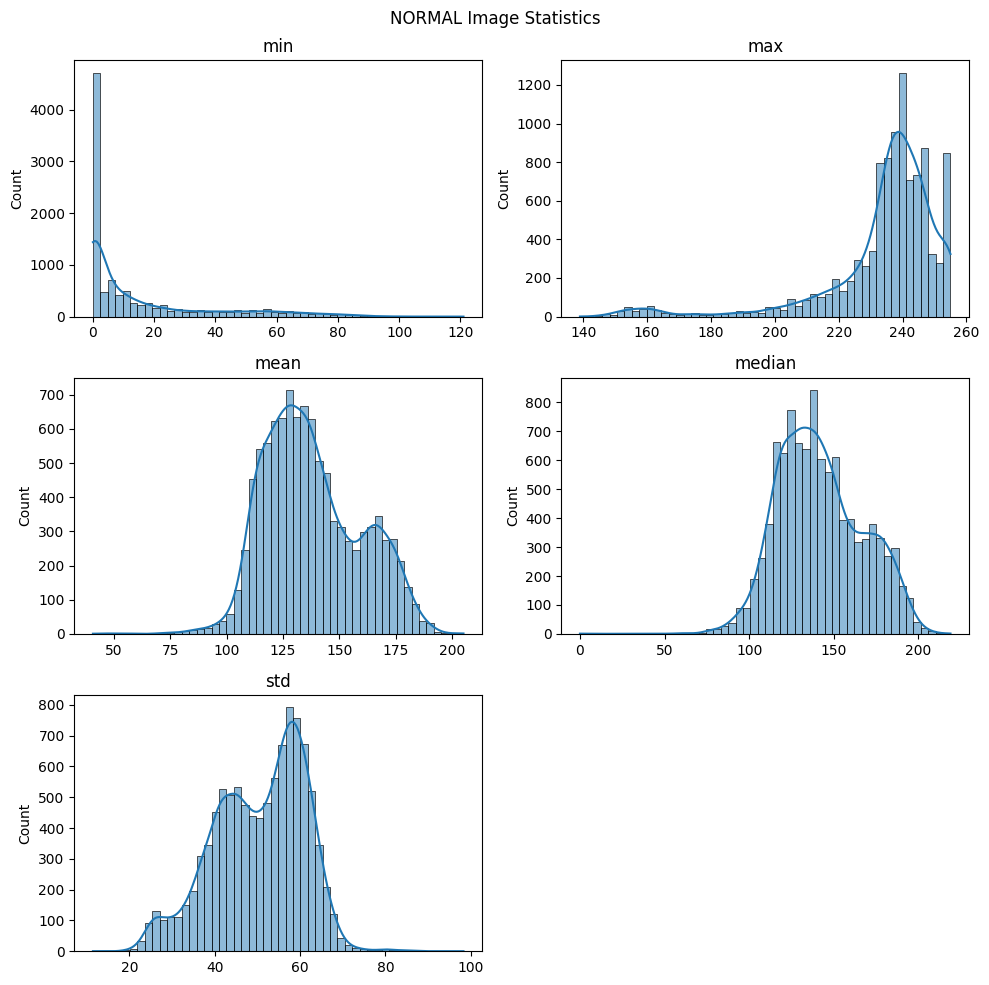

Processing images for: Viral Pneumonia


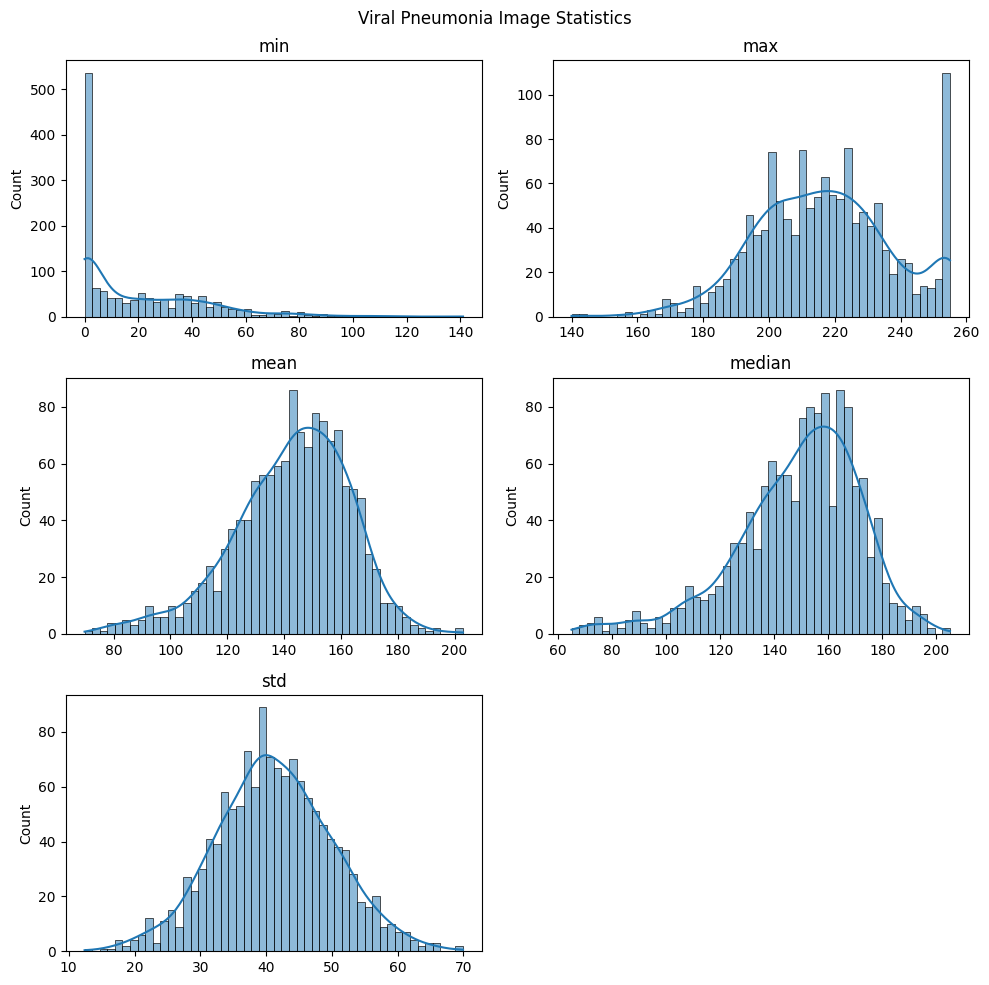

Processing images for: Lung_Opacity


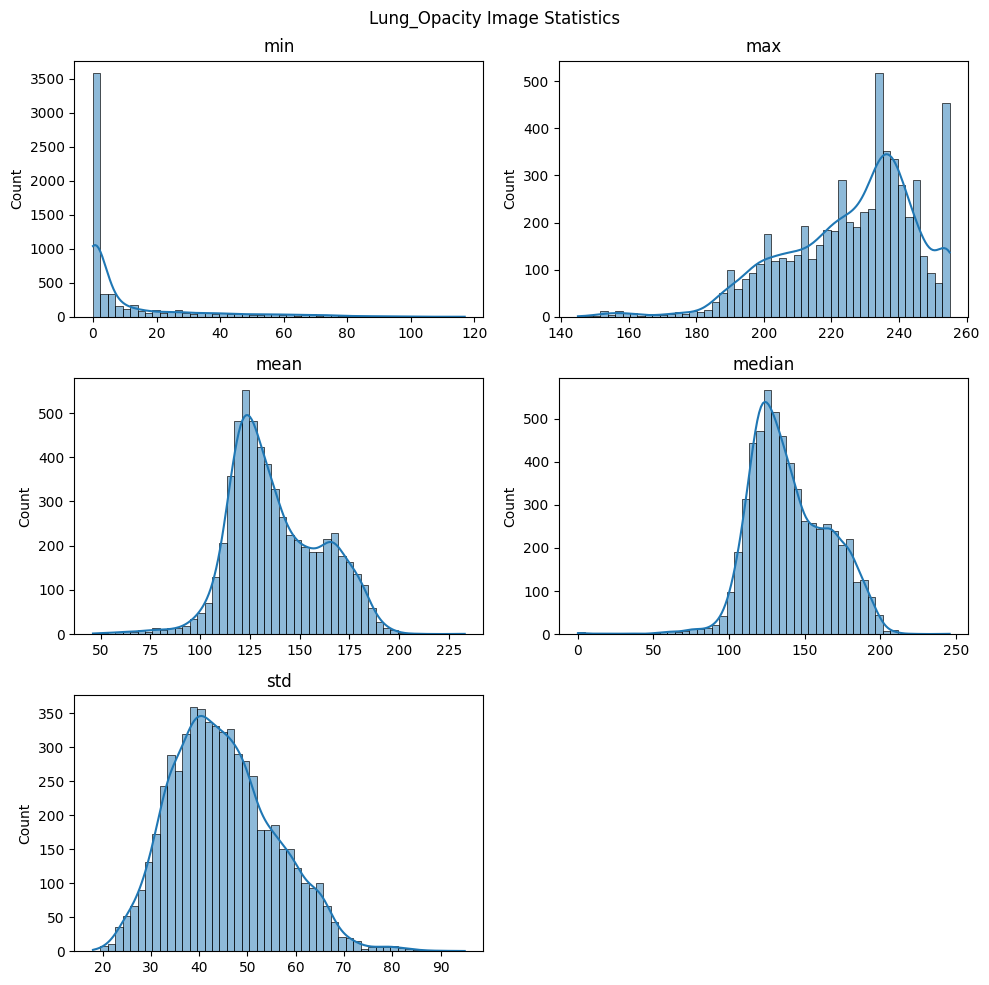

In [7]:
for i in dataset:
    print('Processing images for:',i)
    image_stats = get_images_statistics(raw_data_dir+i+'/images',10)
    plot_images_statistics(i,image_stats)
    del image_stats

### Getting statistics for masked images

The below statistics are for masked images where lung area is used only.

Processing images for: COVID


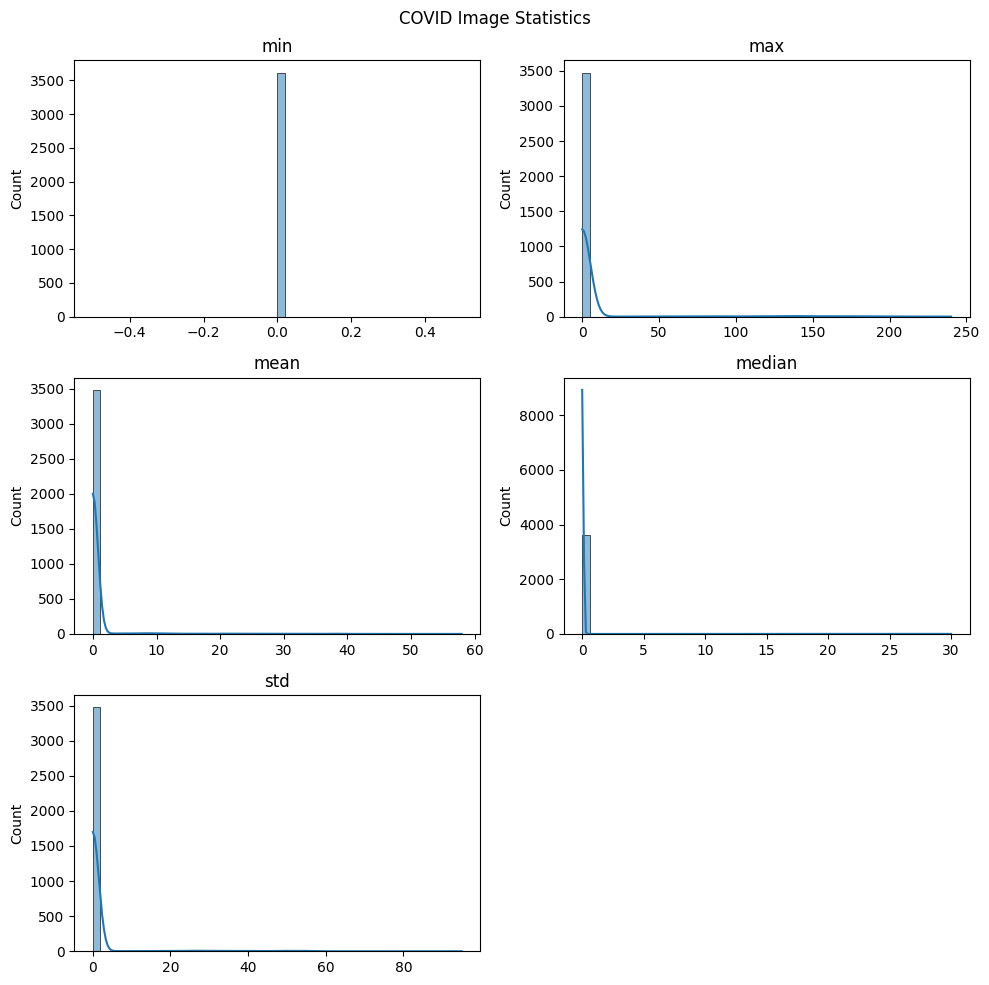

Processing images for: NORMAL


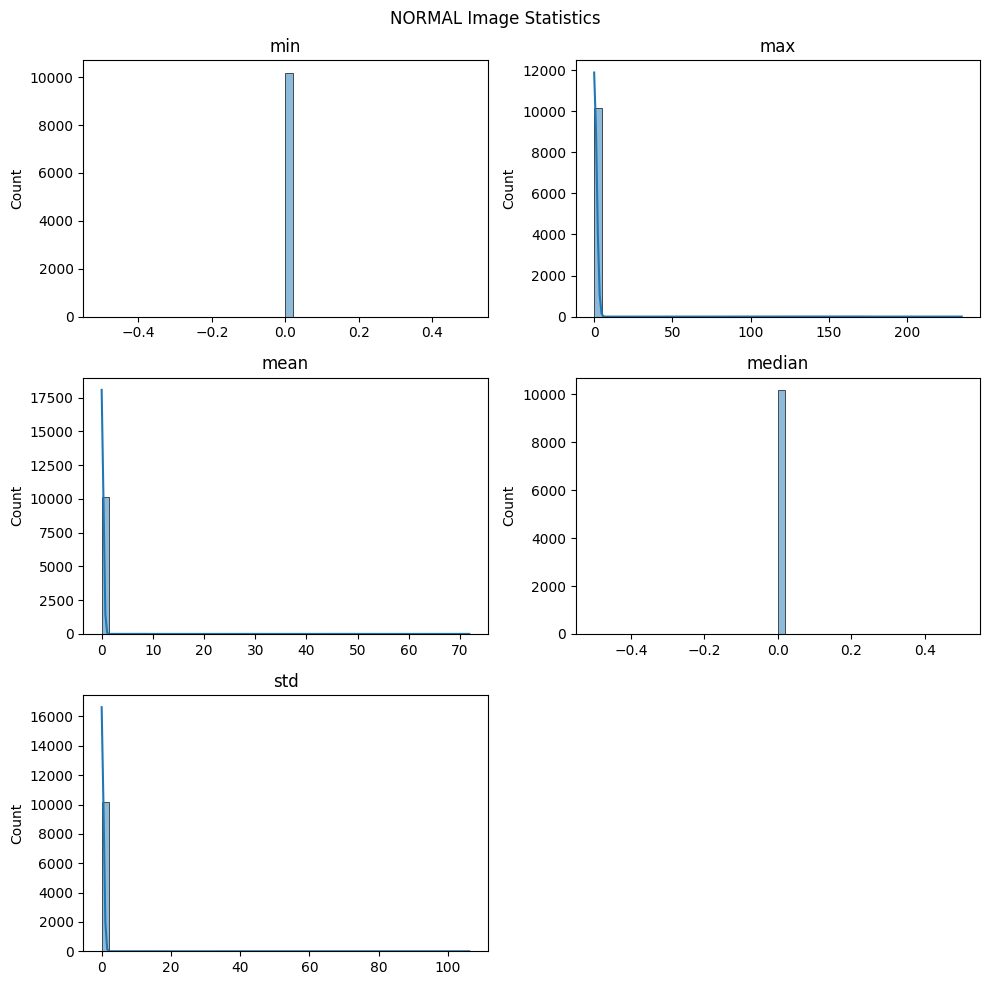

Processing images for: Viral Pneumonia


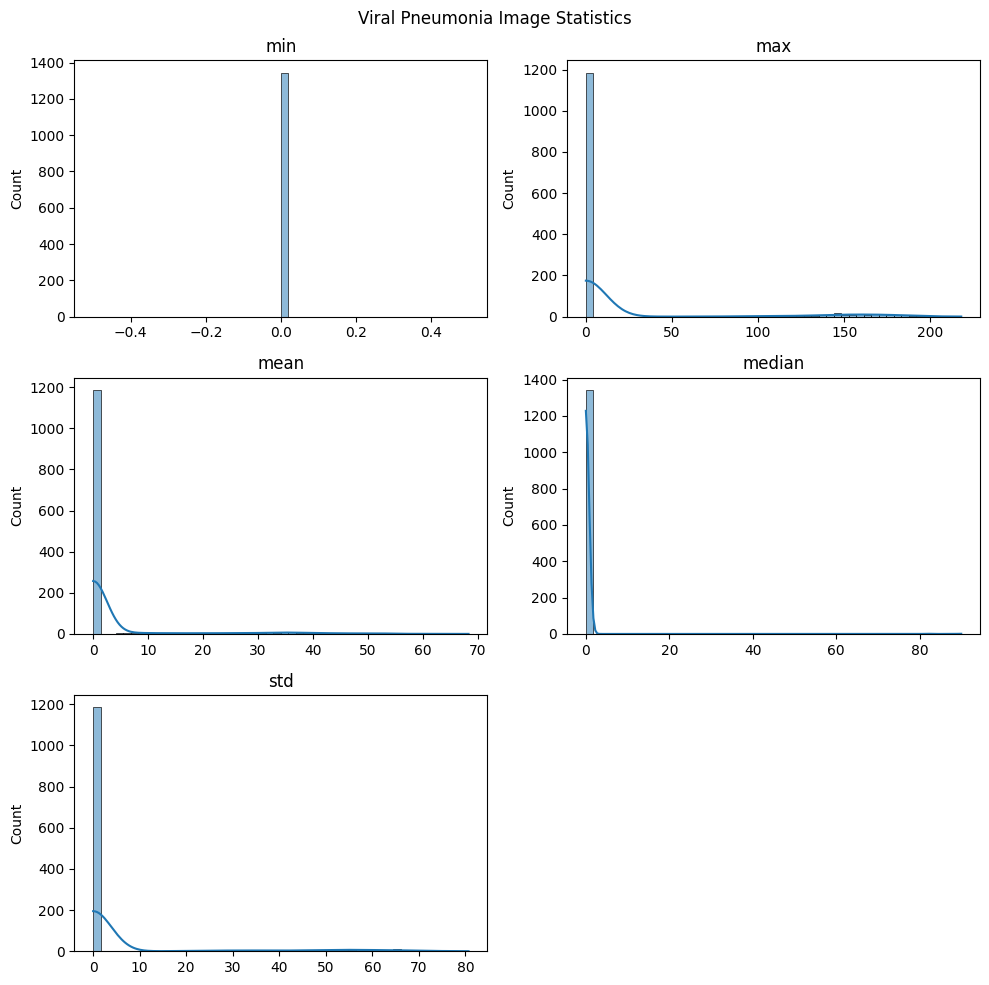

Processing images for: Lung_Opacity


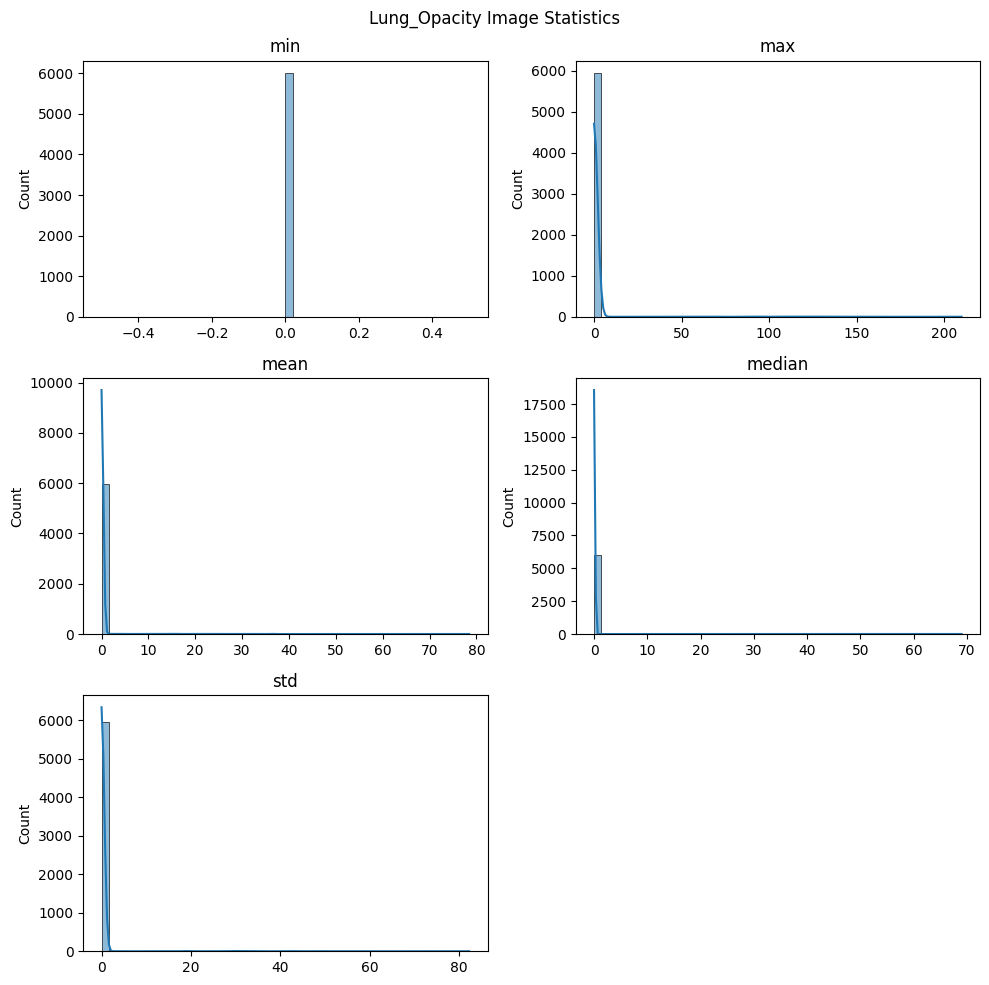

In [8]:
for i in dataset:
    print('Processing images for:',i)
    image_stats = get_masked_images_statistics(raw_data_dir+i+'/images',raw_data_dir+i+'/masks')
    plot_images_statistics(i,image_stats)
    del image_stats

## Edge detecting of dataset's images

To explore the features of the images in the dataset, we can try finding the edges of the images by using Sobel (Gradient calculations).
As an example (one image):

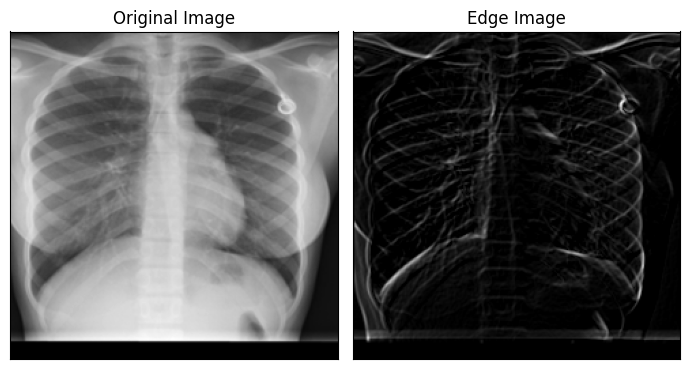

In [9]:
# Import the necessary Libraries
import cv2
from src.preprocessing.image_preprocessor import crop_image
from src.visualization.visualizer import plot_images
 
# Read image from disk.
img = crop_image(raw_data_dir+'/Normal/images/normal-1.png', 10)
#img = cv2.imread('../../COVID-19_Radiography_Dataset/COVID/images/covid-1.png')
# Convert BGR image to RGB
ddept=cv2.CV_8U

x = cv2.Sobel(img[0], ddept, 1,0, ksize=3, scale=1)
y = cv2.Sobel(img[0], ddept, 0,1, ksize=3, scale=1)
absx= cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)
edge = cv2.addWeighted(absx, 0.5, absy, 0.5,0)

plot_images([img[0],edge],['Original Image','Edge Image'])

Detecting the edges for all images, storing the data in csv files and then visualizing them.

Processing images for: COVID


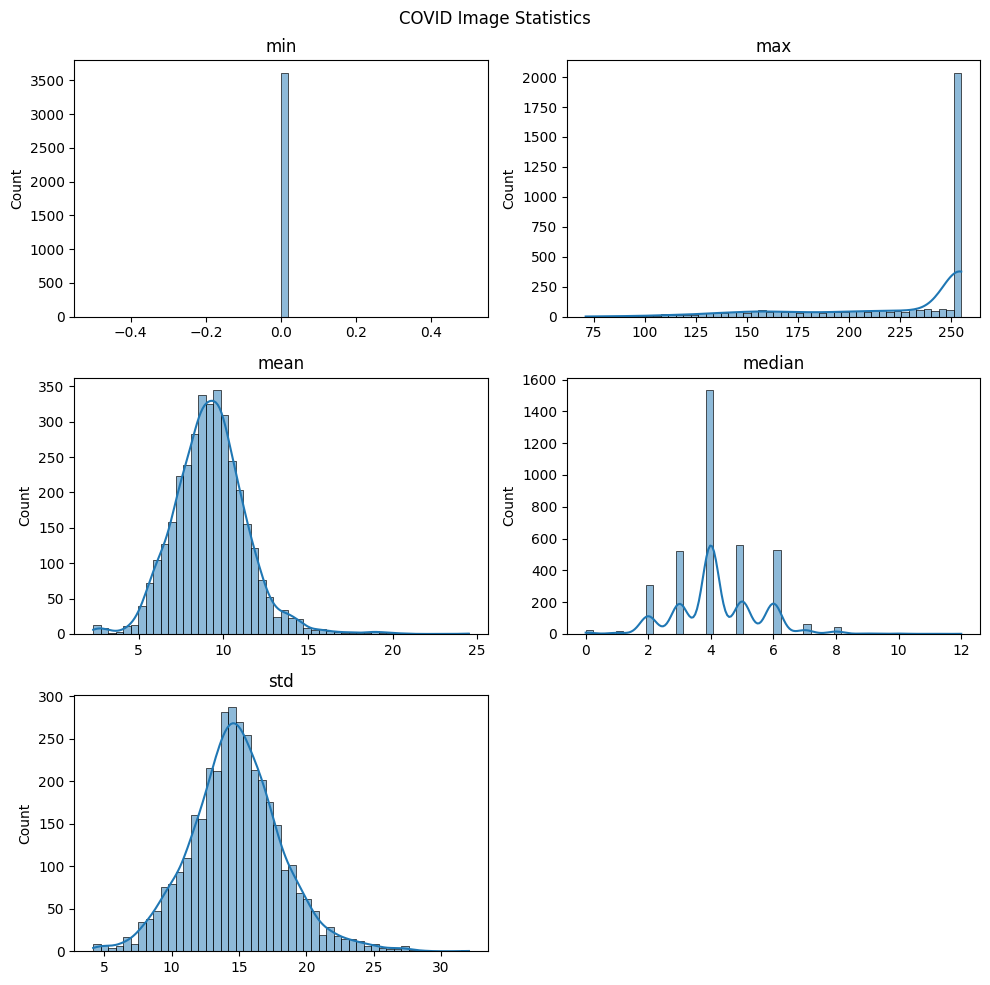

Processing images for: NORMAL


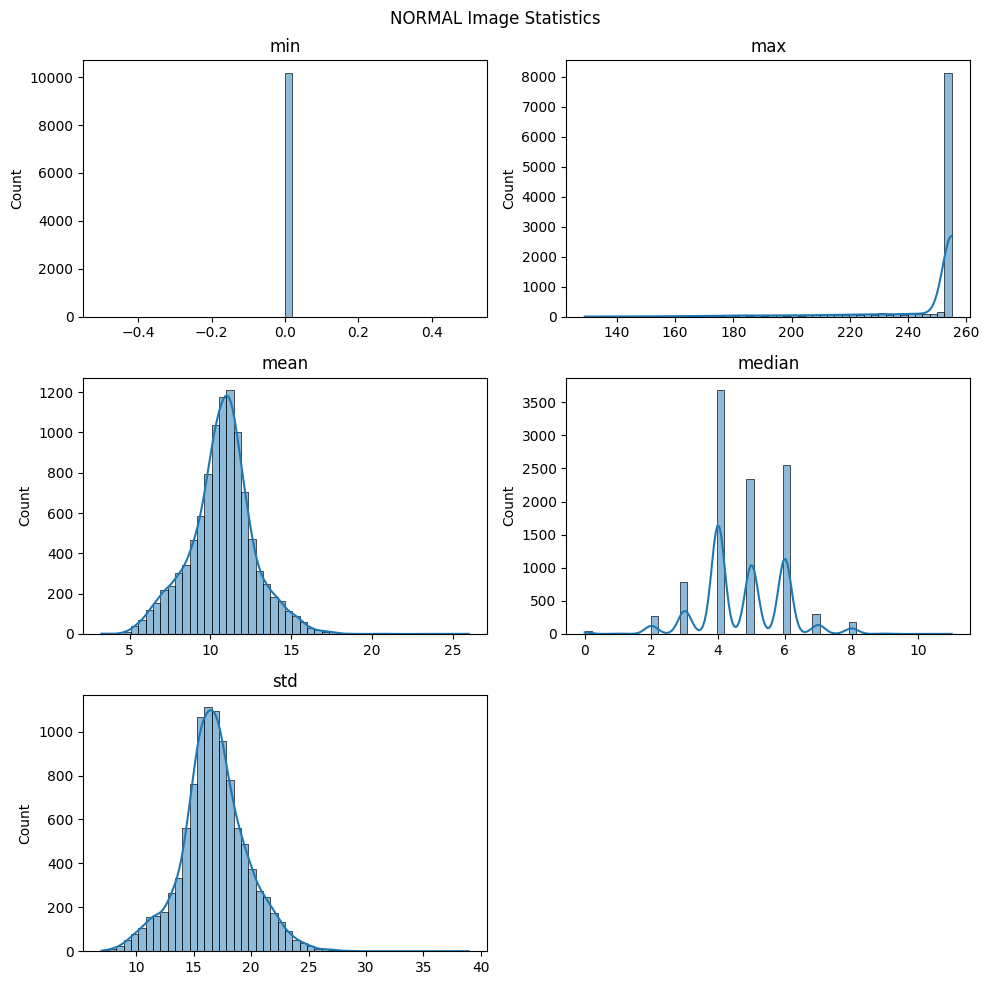

Processing images for: Viral Pneumonia


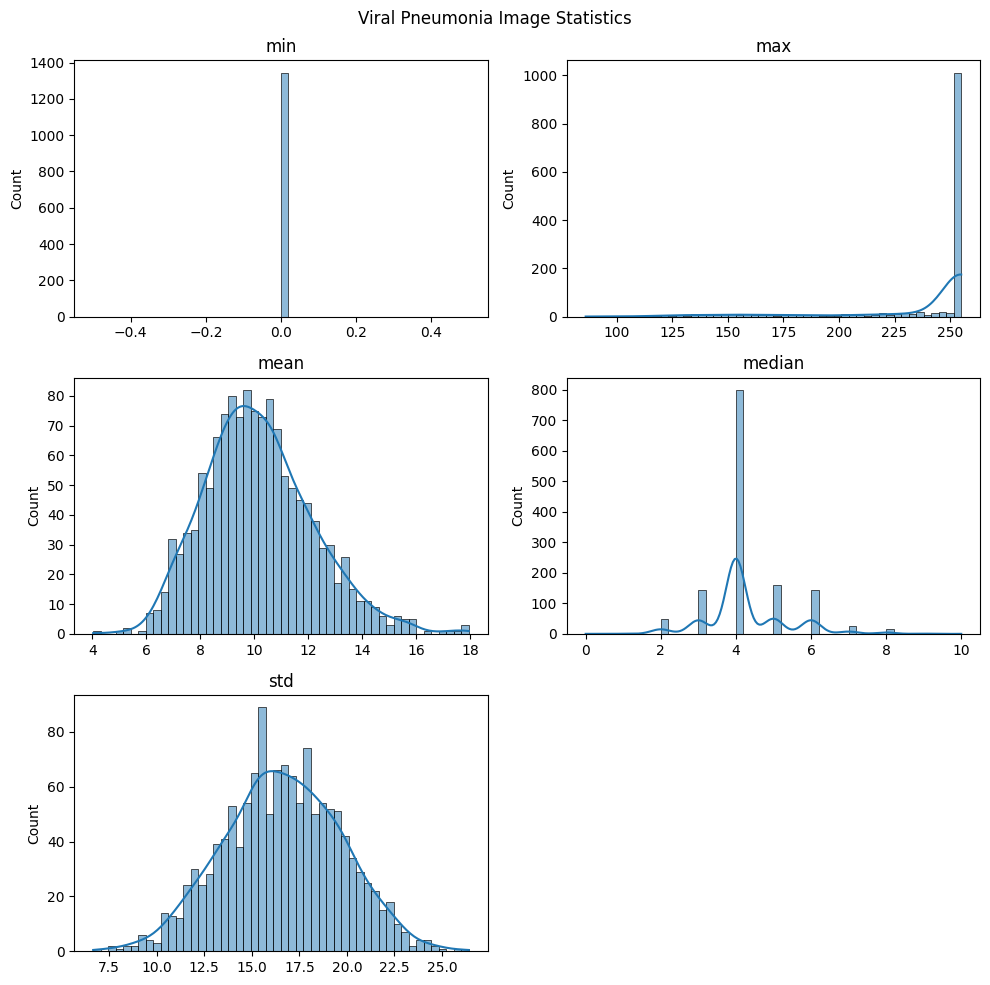

Processing images for: Lung_Opacity


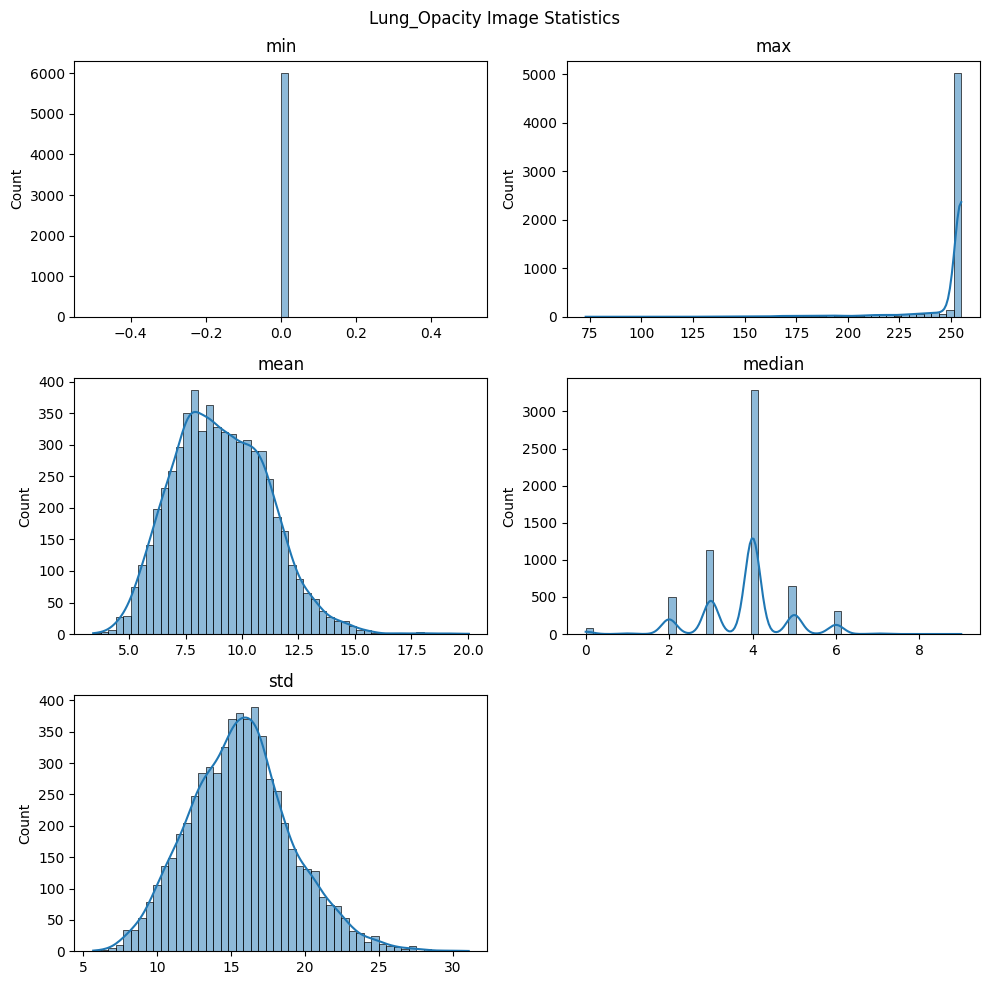

In [10]:
for i in dataset:
    print('Processing images for:',i)
    image_stats = get_edges_images_statistics(raw_data_dir+i+'/images')
    plot_images_statistics(i,image_stats)
    del image_stats